<a href="https://colab.research.google.com/github/mateusvillarroel/PythonXCohen/blob/main/Projects/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

N = 230000
x = np.linspace(0.001,0.01,N)
y = 1/x

samples = y[::1000]
print(1/samples[0])
print(1/samples[49])
print(1/samples[99])
print(1/samples[149])
print(1/samples[199])

0.001
0.002917399640868004
0.004873929886651682
0.006830460132435359
0.008786990378219037


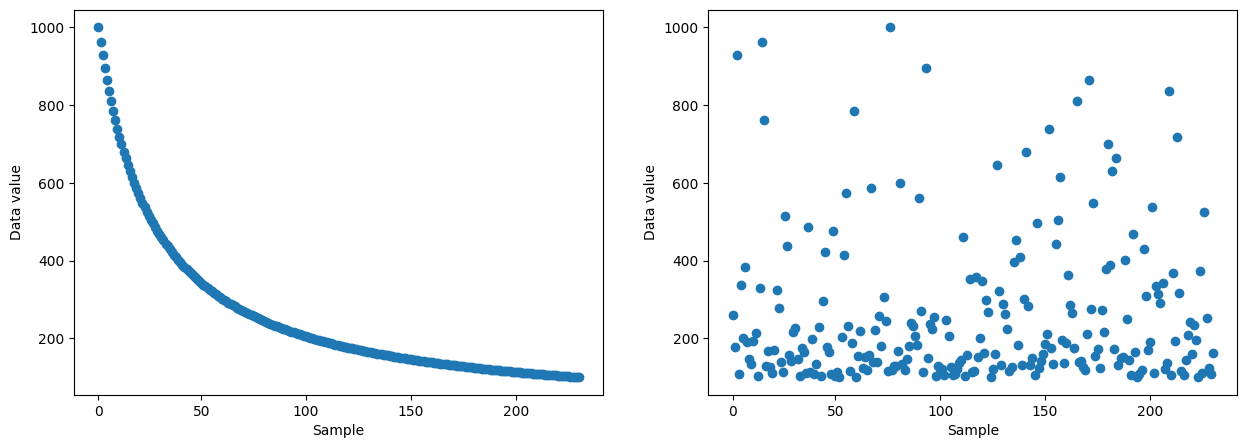

In [2]:
fig,ax = plt.subplots(1,2,figsize=(15, 5))

ax[0].scatter(x[::1000],samples, marker = 'o')
ax[0].set_xlabel('Sample')
ax[0].set_ylabel('Data value')
ax[0].set_xticks([0.001,0.002917399640868004,0.004873929886651682,0.006830460132435359,0.008786990378219037])
ax[0].set_xticklabels([0,50,100,150,200])

x_scrambled = np.random.permutation(x[::1000])

ax[1].scatter(x_scrambled,samples, marker = 'o')
ax[1].set_xlabel('Sample')
ax[1].set_ylabel('Data value')
ax[1].set_xticks([0.001,0.002917399640868004,0.004873929886651682,0.006830460132435359,0.008786990378219037])
ax[1].set_xticklabels([0,50,100,150,200])

plt.show()

Monte Carlo exercise

In [3]:
MonteCarlo = []

for i in range(0,500):
  i = np.average(np.random.choice(y, size=50))
  MonteCarlo = np.append(MonteCarlo,i)

print(MonteCarlo)
len(MonteCarlo)

[284.60219094 241.59704033 230.71815292 234.12742838 236.92844046
 239.08686263 256.67425156 262.82545144 245.32382556 231.88161628
 291.17157016 217.9169731  241.14638547 253.07945305 267.5077629
 268.11727003 244.16426062 261.0273438  316.24434787 235.60393182
 273.06518222 276.62688861 238.85056702 272.25618181 246.27025828
 273.8295391  285.38727008 205.09201289 256.29091397 234.44832293
 202.60057191 269.08598116 280.67962313 241.34618601 252.11986879
 249.25394298 252.53607193 283.99681472 221.68123965 290.74103067
 206.44674146 255.97983044 265.70498717 254.93743903 251.93813081
 248.95405911 267.70039773 252.8203165  218.22682    197.7652254
 248.95709481 235.15766637 256.40293674 246.16901726 243.16995106
 216.65323839 273.33225801 248.14603779 253.05082172 239.18737508
 242.33385531 256.97556809 222.32784529 245.90284459 218.47046562
 218.29986358 280.8511728  300.51733877 229.33350478 331.48097383
 245.12750666 233.94140447 257.47381804 249.66960064 257.13203553
 241.2665069

500

In [4]:
np.average(y)

np.float64(255.84406706888498)

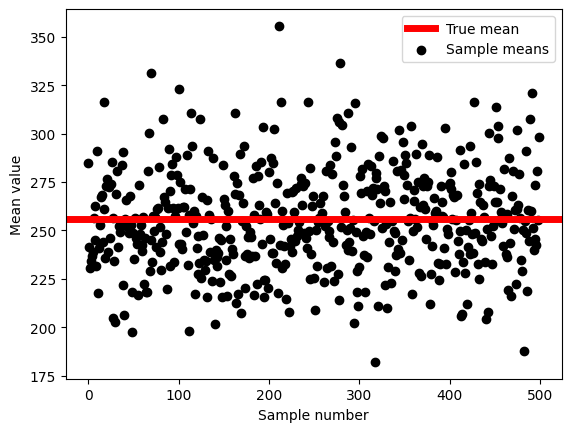

In [5]:
plt.axhline(y=np.average(y), color='red', linestyle='-', label='True mean', linewidth='5')
plt.scatter(np.arange(0,500),MonteCarlo, c = 'black', label = 'Sample means')
plt.xlabel("Sample number")
plt.ylabel("Mean value")
plt.legend()
plt.show()

Cumulative average exercise

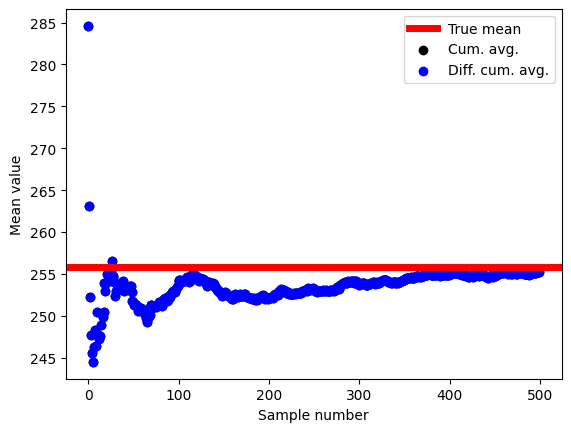

In [6]:
# Using Numpy 'np.cumsum'

cum_sum = np.cumsum(MonteCarlo)
cum_count = np.arange(1,len(MonteCarlo) + 1)
cum_average = cum_sum/cum_count

# Using 'for' loop

cum_avg=[]
curr_sum=0
count=0

for i in MonteCarlo:
  curr_sum += i
  count += 1
  cum_avg.append(curr_sum/count)

plt.axhline(y=np.average(y), color='red', linestyle='-', label='True mean', linewidth='5')
plt.scatter(np.arange(0,500),cum_avg, c = 'black', label = 'Cum. avg.')
plt.scatter(np.arange(0,500),cum_average, c = 'blue', label = 'Diff. cum. avg.')
plt.xlabel("Sample number")
plt.ylabel("Mean value")
plt.legend()
plt.show()


Squared divergence exercise

/tmp/ipython-input-1581894561.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


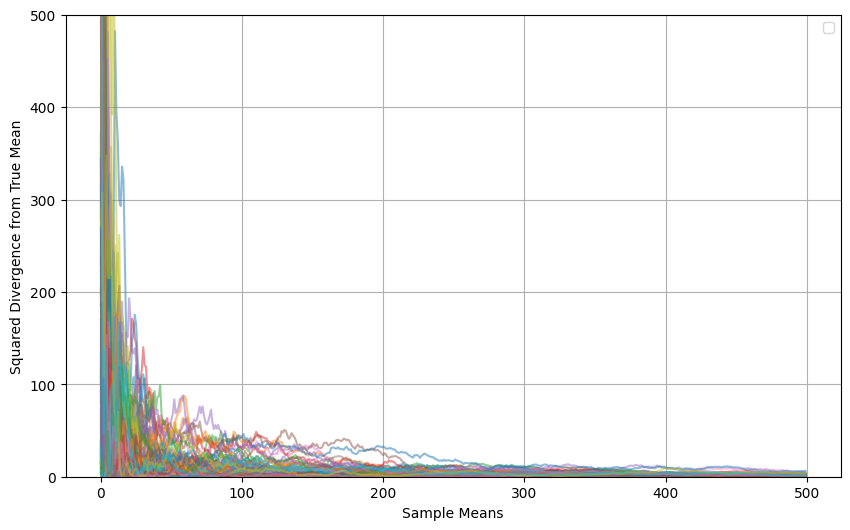

In [19]:
# I found this one to be hard...
# I couldn't get to plot 100 squared divergences from true mean over 500 samples
# I was stuck to calculating the squared divergence of the whole mean cumulative average
# Then the plot looked like 100 straight lines fixed each at one y point
# So I've had to recruit Gemini here...
# In reality, it pretty much looks like the original script...

MonteCarlo100 = [] # This now stores squared_divergences_curve
all_simulation_means = [] # New variable to store all lists of simulation means for later histogram plotting
true_mean = np.average(y)

for _ in range(100):
  # Generate a new set of 500 sample means for each run
  MonteCarlo_simulation_means = []
  for _ in range(500):
    mean_val = np.average(np.random.choice(y, size=50))
    MonteCarlo_simulation_means.append(mean_val)

  all_simulation_means.append(MonteCarlo_simulation_means) # Store the list of means for this run

  # Calculate cumulative average for the current simulation
  current_cum_sum = np.cumsum(MonteCarlo_simulation_means)
  current_cum_count = np.arange(1, len(MonteCarlo_simulation_means) + 1)
  current_cum_average = current_cum_sum / current_cum_count

  # Calculate squared divergence from the true mean for each point in the cumulative average
  squared_divergences_curve = np.power(current_cum_average - true_mean, 2)
  MonteCarlo100.append(squared_divergences_curve)

plt.figure(figsize=(10, 6))
for curve in MonteCarlo100:
  plt.plot(np.arange(len(curve)), curve, linestyle='-', alpha=0.5)
plt.xlabel("Sample Means")
plt.ylabel("Squared Divergence from True Mean")
plt.ylim([0,500])
plt.legend()
plt.grid(True)
plt.show()

Central Limit Theorem

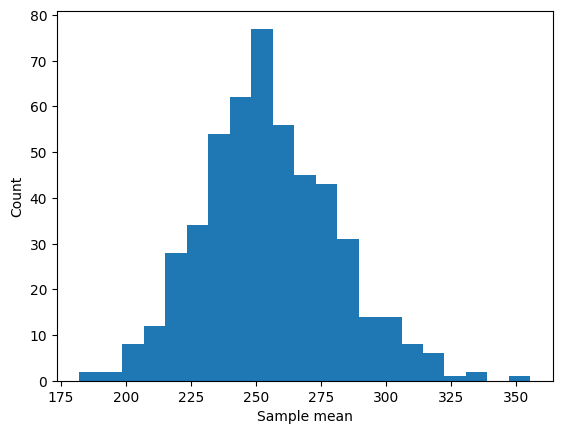

In [16]:
plt.hist(MonteCarlo,bins='fd')
plt.xlabel('Sample mean')
plt.ylabel('Count')

plt.show()

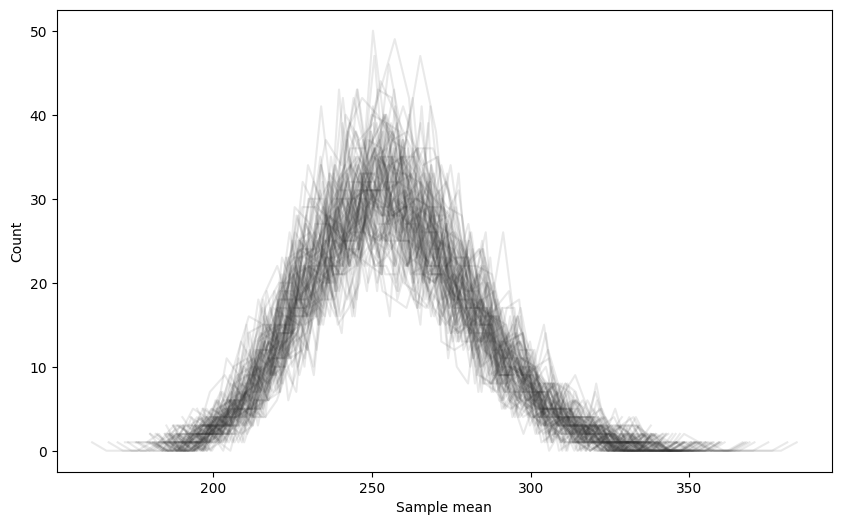

In [21]:
nbins = 40

# Iterate through each list of simulation means stored in all_simulation_means
plt.figure(figsize=(10, 6))
for i in range(len(all_simulation_means)):
  # Get the current list of 500 sample means
  current_simulation_means = all_simulation_means[i]
  y_hist, x_hist = np.histogram(current_simulation_means, bins = nbins)
  x_hist = (x_hist[1:] + x_hist[:-1]) / 2
  plt.plot(x_hist, y_hist, color = [.18,.18,.18],alpha=0.1) # Use a low alpha to visualize overlapping histograms

plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.show()